#BOUDA DAVID W Model

## Importer les librairies


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dropout

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
#from sklearn.metrics import plot_confusion_matrix

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
dataset = pd.read_csv('bank-additional-full.csv', sep=";")

In [ ]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
dataset.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Fontion d'affichage de la performance de l'algorithme

In [ ]:
##evaluateur d'un classificateur
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)

    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )

    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)

##Modalité des variables categorielles

In [ ]:
# Sélectionne les colonnes catégorielles
colonne_categ = dataset.select_dtypes(include=['object']).columns

# Parcourir les colonnes catégorielles et afficher les modalités uniques pour chaque colonne
for col in colonne_categ:
    unique_values = dataset[col].unique()
    print(f"Modalités uniques pour la colonne '{col}': {unique_values}")


Modalités uniques pour la colonne 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Modalités uniques pour la colonne 'marital': ['married' 'single' 'divorced' 'unknown']
Modalités uniques pour la colonne 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Modalités uniques pour la colonne 'default': ['no' 'unknown' 'yes']
Modalités uniques pour la colonne 'housing': ['no' 'yes' 'unknown']
Modalités uniques pour la colonne 'loan': ['no' 'yes' 'unknown']
Modalités uniques pour la colonne 'contact': ['telephone' 'cellular']
Modalités uniques pour la colonne 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Modalités uniques pour la colonne 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']
Modalités uniques pour la colonne 'poutcome': ['nonexistent' 'failure' 'success']
Modalités uniques pou

##valeur maximun et minimun des variables numerique

In [ ]:
def max_min_values(dataframe):
    # Sélectionner les colonnes numériques
    numeric_columns = dataframe.select_dtypes(include=['number'])

    # Obtenir les valeurs maximales et minimales pour chaque colonne numérique
    max_values = numeric_columns.max()
    min_values = numeric_columns.min()

    return max_values, min_values

# Utilisation de la fonction
max_vals, min_vals = max_min_values(dataset)
print("Les valeurs maximales par colonne numérique sont :\n", max_vals)
print("Les valeurs minimales par colonne numérique sont :\n", min_vals)


Les valeurs maximales par colonne numérique sont :
 age                 98.000
duration          4918.000
campaign            56.000
pdays              999.000
previous             7.000
emp.var.rate         1.400
cons.price.idx      94.767
cons.conf.idx      -26.900
euribor3m            5.045
nr.employed       5228.100
dtype: float64
Les valeurs minimales par colonne numérique sont :
 age                 17.000
duration             0.000
campaign             1.000
pdays                0.000
previous             0.000
emp.var.rate        -3.400
cons.price.idx      92.201
cons.conf.idx      -50.800
euribor3m            0.634
nr.employed       4963.600
dtype: float64


##Regrouper les modalités de plusieurs variables

In [ ]:
dataset['y'] = dataset['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
dataset['job'] = dataset['job'].apply(lambda x: 0 if x=='unknown' or x=='unemployed' else (2 if x=='entrepreneur' else (3 if x == 'blue-collar' else ( 4 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (5 if x== 'self-employed' or x=='student' else (6 if x=='housemaid' or x=='retired' else None) )))))
dataset['loan'] = dataset['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
dataset['housing'] = dataset['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
dataset['default'] = dataset['default'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
dataset['pdays'] = dataset['pdays'].apply(lambda x: 0 if x==999 else(1 if x<=10 else(2 if x<=20 else 3)))
dataset['poutcome'] = dataset['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))

supprimer des colonnes qui n'affecte pas de maniere veridict la prediction de y

In [ ]:
dataset.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

In [ ]:
dataset

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,6,married,basic.4y,0,0,0,261,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,4,married,high.school,-1,0,0,149,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,4,married,high.school,0,1,0,226,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,4,married,basic.6y,0,0,0,151,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,4,married,high.school,0,0,1,307,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,married,professional.course,0,1,0,334,1,0,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,married,professional.course,0,0,0,383,1,0,0,-1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,married,university.degree,0,1,0,189,2,0,0,-1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,married,professional.course,0,0,0,442,1,0,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
#drop_first pour eviter
dataset  = pd.get_dummies(dataset, drop_first = True)

In [ ]:
dataset.shape

(41188, 26)

##separation du jeu de données (independantes et dependante)

In [ ]:
X = dataset.drop("y", axis=1).values
y = dataset["y"].values

In [ ]:
X

array([[56.,  6.,  0., ...,  0.,  0.,  0.],
       [57.,  4., -1., ...,  0.,  0.,  0.],
       [37.,  4.,  0., ...,  0.,  0.,  0.],
       ...,
       [56.,  6.,  0., ...,  0.,  1.,  0.],
       [44.,  4.,  0., ...,  1.,  0.,  0.],
       [74.,  6.,  0., ...,  1.,  0.,  0.]])

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
X.shape

(41188, 25)

In [ ]:
y.shape

(41188,)

##Separation du jeu de données (entrainement-test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape

(32950, 25)

In [ ]:
y_train.shape

(32950,)

##standardiser

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test =sc_x.transform(x_test)

In [ ]:
x_train

array([[ 3.18241726e-03,  2.16415846e-01,  5.11167694e-01, ...,
        -3.81587198e-01, -6.49218020e-01, -2.09470076e-01],
       [-6.67772373e-01, -3.50098393e+00,  5.11167694e-01, ...,
        -3.81587198e-01,  1.54031461e+00, -2.09470076e-01],
       [-8.59473741e-01,  2.16415846e-01,  5.11167694e-01, ...,
         2.62063299e+00, -6.49218020e-01, -2.09470076e-01],
       ...,
       [-1.05117511e+00,  2.16415846e-01,  5.11167694e-01, ...,
         2.62063299e+00, -6.49218020e-01, -2.09470076e-01],
       [-4.76071004e-01,  2.07511573e+00,  5.11167694e-01, ...,
         2.62063299e+00, -6.49218020e-01, -2.09470076e-01],
       [ 1.15339063e+00,  2.16415846e-01,  5.11167694e-01, ...,
        -3.81587198e-01, -6.49218020e-01, -2.09470076e-01]])

In [ ]:
x_test

array([[-0.09266827, -0.7129341 ,  0.51116769, ..., -0.3815872 ,
        -0.64921802, -0.20947008],
       [ 1.44094268, -0.7129341 ,  0.51116769, ..., -0.3815872 ,
        -0.64921802, -0.20947008],
       [-0.09266827, -0.7129341 , -1.95486093, ..., -0.3815872 ,
        -0.64921802, -0.20947008],
       ...,
       [-0.57192169,  0.21641585,  0.51116769, ..., -0.3815872 ,
        -0.64921802, -0.20947008],
       [ 0.48243584,  0.21641585,  0.51116769, ..., -0.3815872 ,
         1.54031461, -0.20947008],
       [-0.476071  ,  0.21641585,  0.51116769, ..., -0.3815872 ,
        -0.64921802, -0.20947008]])

##Modele

Modélisation avec l'arbre de décision

In [ ]:
classification= DecisionTreeClassifier(criterion="entropy",random_state=0)
classification.fit(x_train, y_train)
classifier(classification, x_train,x_test,y_train,y_test)

Train accuracy is: 1.0
Test accuracy is: 0.8897790725904345

Train ROC is: 1.0
Test ROC is: 0.7276862685861964

F score is: 0.5123523093447906
Precision is: 0.5058324496288441
Recall is: 0.5190424374319913


Using ANN

##Prediction

In [ ]:
#Catgoriser les predictions.
#si les valeurs de y_pred sont supérieur a 0.5 on le categorise en 1
y_pred=classification.predict(x_test)
y_pred_transformed = (y_pred > 0.5).astype(int)

##Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
#la matrice de confusion
cm = confusion_matrix(y_test, y_pred_transformed)
print(cm)
accuracy_score(y_test, y_pred_transformed)

[[6853  466]
 [ 442  477]]


0.8897790725904345

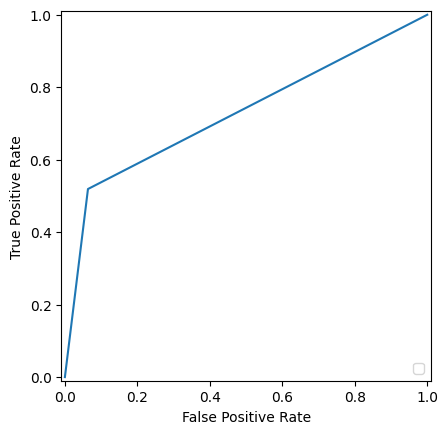

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# y_true sont les vraies étiquettes, y_score sont les scores de décision ou les probabilités prédites
fpr, tpr, _ = roc_curve(y_test, y_pred)

# la courbe ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()
